# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from IPython.display import display, HTML
import networkx as nx


In [3]:
# Data with no interventions

data1_none = pd.read_csv("data/data_50.csv", index_col = 0)
data1_i1 = pd.read_csv("data/data_52.csv", index_col = 0)
data1_p1 = pd.read_csv("data/data_54.csv", index_col = 0)
data1_s1 = pd.read_csv("data/data_55.csv", index_col = 0)
data1_b1 = pd.read_csv("data/data_56.csv", index_col = 0)
data1_k1 = pd.read_csv("data/data_57.csv", index_col = 0)
data1_a1 = pd.read_csv("data/data_58.csv", index_col = 0)

data2_none = pd.read_csv("data/data_203.csv", index_col = 0)
data2_i1 = pd.read_csv("data/data_204.csv", index_col = 0)
data2_p1 = pd.read_csv("data/data_205.csv", index_col = 0)
data2_s1 = pd.read_csv("data/data_206.csv", index_col = 0)
data2_b1 = pd.read_csv("data/data_207.csv", index_col = 0)
data2_k1 = pd.read_csv("data/data_208.csv", index_col = 0)
data2_a1 = pd.read_csv("data/data_209.csv", index_col = 0)

resamples = 300
replace = True
seed = 400

np.random.seed(seed)

data_none = pd.concat((data1_none, data2_none)).sample(resamples, replace = replace)
data_i1 = pd.concat((data1_i1, data2_i1)).sample(resamples, replace = replace)
data_p1 = pd.concat((data1_p1, data2_p1)).sample(resamples, replace = replace)
data_s1 = pd.concat((data1_s1, data2_s1)).sample(resamples, replace = replace)
data_b1 = pd.concat((data1_b1, data2_b1)).sample(resamples, replace = replace)
data_k1 = pd.concat((data1_k1, data2_k1)).sample(resamples, replace = replace)
data_a1 = pd.concat((data1_a1, data2_a1)).sample(resamples, replace = replace)


display(data_i1.head())

display(data1_i1.loc[9, :])
display(data2_i1.loc[9, :])

,I,P,S,B,K,A
21,1.0,0.076557,1.0,0.076557,0.780059,1.010840
3,1.0,0.642540,1.0,-0.357460,0.615820,0.938359
12,1.0,7.990193,1.0,6.990193,0.481909,5.318261
7,1.0,1.968503,1.0,0.968503,0.277977,2.422591
19,1.0,3.358048,0.0,4.358048,0.421125,5.900748


I    1.000000
P    1.411324
S    1.000000
B    0.411324
K    0.586963
A    0.622460
Name: 9, dtype: float64

I    1.000000
P    6.931452
S    0.000000
B    5.931452
K    0.883092
A    0.048511
Name: 9, dtype: float64

# Statistics


In [6]:
pd.set_option('precision', 3)


no_means = data_none.mean()
i1_means = data_i1.mean()
p1_means = data_p1.mean()
s1_means = data_s1.mean()
b1_means = data_b1.mean()
k1_means = data_k1.mean()
a1_means = data_a1.mean()

means = pd.DataFrame(list(zip(no_means, i1_means, p1_means, s1_means, b1_means, k1_means, a1_means)), 
             columns = ["None", "I1", "P1", "S1", "B1", "K1", "A1"], index = ["I", "P", "S", "B", "K", "A"])


print("\033[1mMeans with the different interventions\033[0m")
display(means)

mean_diff = means.sub(means["None"], axis = 0).divide(means["None"], axis = 0)
diff_bound = .3

print("\n\033[1mThe difference in means when making interventions\033[0m")
mean_diff_marked = mean_diff.style.applymap(lambda x: 'background-color : yellow' if abs(x)>diff_bound else '')
display(mean_diff_marked)

no_var = data_none.var()
i1_var = data_i1.var()
p1_var = data_p1.var()
s1_var = data_s1.var()
b1_var = data_b1.var()
k1_var = data_k1.var()
a1_var = data_a1.var()

var = pd.DataFrame(list(zip(no_var, i1_var, p1_var, s1_var, b1_var, k1_var, a1_var)), 
             columns = ["None", "I1", "P1", "S1", "B1", "K1", "A1"], index = ["I", "P", "S", "B", "K", "A"])

print("\033[1mVariance with the different interventions\033[0m")
display(var)

var_diff = var.sub(var["None"], axis = 0).divide(var["None"], axis = 0)
diff_bound = .3

print("\n\033[1mThe difference in variance when making interventions\033[0m")
var_diff_marked = var_diff.style.applymap(lambda x: 'background-color : yellow' if abs(x)>diff_bound else '')
display(var_diff_marked)

corr_bound = .3
print("\n\033[1mCorrelations in dataset without interventions\033[0m")
corrs = data_none.corr().style.applymap(lambda x: 'background-color : yellow' if abs(x) > corr_bound else '')
display(corrs)

print(mean_diff.to_latex(caption = "The percentagewise difference in means with different interventions", label = "tab:means"))
print(var_diff.to_latex(caption = "The percentagewise difference in variances with different interventions", label = "tab:vars"))
print(data_none.corr().to_latex(caption = "The correlations when no interventions were performed", label = "tab:corrs"))

Means with the different interventions


,None,I1,P1,S1,B1,K1,A1
I,0.564,1.000,0.744,0.651,0.364,0.925,0.369
P,1.720,2.168,1.000,2.075,2.165,1.666,2.010
S,0.673,0.593,0.533,1.000,0.627,0.587,0.570
B,1.709,1.928,0.899,2.087,1.000,1.541,2.234
K,0.650,0.601,0.617,0.586,0.555,1.000,0.577
A,0.802,0.941,0.440,0.267,0.481,0.702,1.000



The difference in means when making interventions


,None,I1,P1,S1,B1,K1,A1
I,0.000,0.772,0.319,0.154,-0.355,0.640,-0.346
P,0.000,0.261,-0.419,0.207,0.259,-0.031,0.169
S,0.000,-0.119,-0.208,0.485,-0.069,-0.129,-0.153
B,0.000,0.128,-0.474,0.221,-0.415,-0.098,0.308
K,0.000,-0.076,-0.051,-0.099,-0.147,0.538,-0.112
A,0.000,0.173,-0.451,-0.667,-0.399,-0.124,0.248


Variance with the different interventions


,None,I1,P1,S1,B1,K1,A1
I,0.865,0.000,1.153,0.936,1.039,1.228,0.700
P,12.169,8.913,0.000,12.950,14.722,16.656,10.642
S,0.221,0.242,0.250,0.000,0.235,0.243,0.246
B,11.737,8.896,1.461,13.700,0.000,17.394,10.552
K,0.042,0.031,0.032,0.035,0.042,0.000,0.046
A,20.876,12.462,2.963,31.848,0.890,9.258,0.000



The difference in variance when making interventions


,None,I1,P1,S1,B1,K1,A1
I,0.000,-1.000,0.332,0.082,0.201,0.419,-0.191
P,0.000,-0.268,-1.000,0.064,0.210,0.369,-0.125
S,0.000,0.097,0.132,-1.000,0.064,0.102,0.114
B,0.000,-0.242,-0.876,0.167,-1.000,0.482,-0.101
K,0.000,-0.257,-0.243,-0.163,-0.000,-1.000,0.098
A,0.000,-0.403,-0.858,0.526,-0.957,-0.557,-1.000



Correlations in dataset without interventions


,I,P,S,B,K,A
I,1.000,0.384,0.138,0.092,0.124,-0.063
P,0.384,1.000,0.156,0.934,-0.087,-0.056
S,0.138,0.156,1.000,0.121,-0.153,0.052
B,0.092,0.934,0.121,1.000,-0.117,-0.010
K,0.124,-0.087,-0.153,-0.117,1.000,-0.107
A,-0.063,-0.056,0.052,-0.010,-0.107,1.000


\begin{table}
\centering
\caption{The percentagewise difference in means with different interventions}
\label{tab:means}
\begin{tabular}{lrrrrrrr}
\toprule
{} &  None &     I1 &     P1 &     S1 &     B1 &     K1 &     A1 \\
\midrule
I &   0.0 &  0.772 &  0.319 &  0.154 & -0.355 &  0.640 & -0.346 \\
P &   0.0 &  0.261 & -0.419 &  0.207 &  0.259 & -0.031 &  0.169 \\
S &   0.0 & -0.119 & -0.208 &  0.485 & -0.069 & -0.129 & -0.153 \\
B &   0.0 &  0.128 & -0.474 &  0.221 & -0.415 & -0.098 &  0.308 \\
K &   0.0 & -0.076 & -0.051 & -0.099 & -0.147 &  0.538 & -0.112 \\
A &   0.0 &  0.173 & -0.451 & -0.667 & -0.399 & -0.124 &  0.248 \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\centering
\caption{The percentagewise difference in variances with different interventions}
\label{tab:vars}
\begin{tabular}{lrrrrrrr}
\toprule
{} &  None &     I1 &     P1 &     S1 &         B1 &     K1 &     A1 \\
\midrule
I &   0.0 & -1.000 &  0.332 &  0.082 &  2.011e-01 &  0.419 & -0.191 \\
P &   0.0 & -0.

In [8]:
caus = np.zeros(np.shape(mean_diff))

mean_bound = .2
var_bound = .2
corr_bound = .0


for i in range(np.shape(mean_diff)[0]):
    for j in range(np.shape(mean_diff)[1]):
        cond1 = i != j-1
        cond2 = abs(mean_diff.iloc[i, j]) > mean_bound
        cond3 = abs(var_diff.iloc[i,j]) > var_bound
        cond4 = True if j == 0 else abs(data_none.corr().iloc[i, j-1]) > corr_bound
        
        if cond1  & cond2 & cond3 & cond4:
            caus[i, j] = 1

caus = pd.DataFrame(caus, columns = mean_diff.columns, index = mean_diff.index)

caus_styled = caus.style.applymap(lambda x: 'background-color : yellow' if abs(x)==1 else '')
display(caus_styled)
        

,None,I1,P1,S1,B1,K1,A1
I,0.000,0.000,1.000,0.000,1.000,1.000,0.000
P,0.000,1.000,0.000,0.000,1.000,0.000,0.000
S,0.000,0.000,0.000,0.000,0.000,0.000,0.000
B,0.000,0.000,1.000,0.000,0.000,0.000,0.000
K,0.000,0.000,0.000,0.000,0.000,0.000,0.000
A,0.000,0.000,1.000,1.000,1.000,0.000,0.000


In [9]:
bound = .2
print("\n\033[1mCorrelations in dataset without interventions\033[0m")
display(data_none.corr().style.applymap(lambda x: 'background-color : yellow' if abs(x) > bound else ''))
print("\n\033[1mCorrelations in dataset with intervention on I\033[0m")
display(data_i1.corr().style.applymap(lambda x: 'background-color : yellow' if abs(x)>bound else ''))
print("\n\033[1mCorrelations in dataset with intervention on P\033[0m")
display(data_p1.corr().style.applymap(lambda x: 'background-color : yellow' if abs(x)>bound else ''))
print("\n\033[1mCorrelations in dataset with intervention on S\033[0m")
display(data_s1.corr().style.applymap(lambda x: 'background-color : yellow' if abs(x)>bound else ''))
print("\n\033[1mCorrelations in dataset with intervention on B\033[0m")
display(data_b1.corr().style.applymap(lambda x: 'background-color : yellow' if abs(x)>bound else ''))
print("\n\033[1mCorrelations in dataset with intervention on K\033[0m")
display(data_k1.corr().style.applymap(lambda x: 'background-color : yellow' if abs(x)>bound else ''))
print("\n\033[1mCorrelations in dataset with intervention on A\033[0m")
display(data_a1.corr().style.applymap(lambda x: 'background-color : yellow' if abs(x)>bound else ''))


Correlations in dataset without interventions


,I,P,S,B,K,A
I,1.000,0.384,0.138,0.092,0.124,-0.063
P,0.384,1.000,0.156,0.934,-0.087,-0.056
S,0.138,0.156,1.000,0.121,-0.153,0.052
B,0.092,0.934,0.121,1.000,-0.117,-0.010
K,0.124,-0.087,-0.153,-0.117,1.000,-0.107
A,-0.063,-0.056,0.052,-0.010,-0.107,1.000



Correlations in dataset with intervention on I


,I,P,S,B,K,A
I,nan,nan,nan,nan,nan,nan
P,nan,1.000,0.022,0.969,0.054,0.033
S,nan,0.022,1.000,0.035,0.129,0.260
B,nan,0.969,0.035,1.000,0.068,0.019
K,nan,0.054,0.129,0.068,1.000,0.074
A,nan,0.033,0.260,0.019,0.074,1.000



Correlations in dataset with intervention on P


,I,P,S,B,K,A
I,1.000,nan,-0.091,-0.833,0.152,0.131
P,nan,nan,nan,nan,nan,nan
S,-0.091,nan,1.000,0.086,-0.142,0.307
B,-0.833,nan,0.086,1.000,-0.123,-0.120
K,0.152,nan,-0.142,-0.123,1.000,-0.175
A,0.131,nan,0.307,-0.120,-0.175,1.000



Correlations in dataset with intervention on S


,I,P,S,B,K,A
I,1.000,0.206,nan,-0.096,0.226,0.014
P,0.206,1.000,nan,0.936,0.095,-0.505
S,nan,nan,nan,nan,nan,nan
B,-0.096,0.936,nan,1.000,0.041,-0.498
K,0.226,0.095,nan,0.041,1.000,-0.000
A,0.014,-0.505,nan,-0.498,-0.000,1.000



Correlations in dataset with intervention on B


,I,P,S,B,K,A
I,1.000,0.459,-0.011,nan,-0.065,0.071
P,0.459,1.000,0.109,nan,-0.126,0.157
S,-0.011,0.109,1.000,nan,-0.170,0.461
B,nan,nan,nan,nan,nan,nan
K,-0.065,-0.126,-0.170,nan,1.000,-0.138
A,0.071,0.157,0.461,nan,-0.138,1.000



Correlations in dataset with intervention on K


,I,P,S,B,K,A
I,1.000,0.105,0.010,-0.172,nan,0.012
P,0.105,1.000,0.081,0.942,nan,0.280
S,0.010,0.081,1.000,0.077,nan,-0.142
B,-0.172,0.942,0.077,1.000,nan,0.305
K,nan,nan,nan,nan,nan,nan
A,0.012,0.280,-0.142,0.305,nan,1.000



Correlations in dataset with intervention on A


,I,P,S,B,K,A
I,1.000,0.165,-0.128,-0.044,0.247,nan
P,0.165,1.000,-0.201,0.956,-0.200,nan
S,-0.128,-0.201,1.000,-0.224,-0.057,nan
B,-0.044,0.956,-0.224,1.000,-0.220,nan
K,0.247,-0.200,-0.057,-0.220,1.000,nan
A,nan,nan,nan,nan,nan,nan


# The causal graph

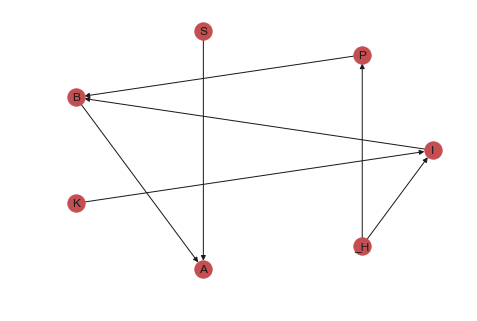

In [73]:
G = nx.DiGraph()
G.add_nodes_from(["I", "P", "S", "B", "K", "A", "_H"])
G.add_edges_from([("S", "A"), ("B", "A"), ("K", "A"), ('P', 'B'), ('P', 'A'), ('I', 'P')])


# initial graph

G1 = nx.DiGraph()
G1.add_nodes_from(["I", "P", "S", "B", "K", "A", "_H"])
G1.add_edges_from([("S", "A"), ("B", "A"), ("I", "B"), ("P", "B"), ("K", "I"), ("_H", "I"), ("_H", "P")])

#final

G_final = nx.DiGraph()
G_final.add_nodes_from(["I", "P", "S", "B", "K", "A", "_H"])
G_final.add_edges_from([("S", "A"), ("B", "A"), ("I", "B"), ("P", "B"), ("K", "I"), ("_H", "I"), ("_H", "P")])

nx.draw_shell(G_final, with_labels = True)